# POVERTY SOMETHING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
#from matplotlib_venn import venn2

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import Petra

# Read and clean data

First we show what we do with the first set of data, then we do the same for all the other datasets, the only difference is the age-range considered. We do this to enable us to later merge the data with the different age-range specified

In [ ]:
filename = 'relative_poverty.xlsx'
rp_tot = pd.read_excel(filename, sheet_name= 'Age-total')
rp_tot

In [ ]:
# Rename columns by specifying a function
# Lambda function to modify the column names
# rp_tot.columns = rp_tot.columns.map(lambda x: x + '_rp_tot' if x.isdigit() else x)
# rp_tot
rp_tot.columns = rp_tot.columns.map(lambda x: 'location' if x == 'Unnamed: 0' else x + '_rp_tot' if x.isdigit() else x)
rp_tot

In [ ]:
#Here we import all the datasets on relative poverty, but considering the data for different age ranges
rp_17 = pd.read_excel(filename, sheet_name= '0-17')
rp_29 = pd.read_excel(filename, sheet_name= '18-29')
rp_39 = pd.read_excel(filename, sheet_name= '30-39')
rp_49 = pd.read_excel(filename, sheet_name= '40-49')
rp_59 = pd.read_excel(filename, sheet_name= '50-59')
rp_69 = pd.read_excel(filename, sheet_name= '60-69')
rp_79 = pd.read_excel(filename, sheet_name= '70-79')
rp_80 = pd.read_excel(filename, sheet_name= '80-onwards')

In [ ]:
def rename_columns(df, suffix):
    df.columns = df.columns.map(lambda x: 'location' if x == 'Unnamed: 0' else str(x) + suffix)
    return df

# Apply the renaming function to each DataFrame
rp_17 = rename_columns(rp_17, '_rp_17')
rp_29 = rename_columns(rp_29, '_rp_29')
rp_39 = rename_columns(rp_39, '_rp_39')
rp_49 = rename_columns(rp_49, '_rp_49')
rp_59 = rename_columns(rp_59, '_rp_59')
rp_69 = rename_columns(rp_69, '_rp_69')
rp_79 = rename_columns(rp_79, '_rp_79')
rp_80 = rename_columns(rp_80, '_rp_80')

rp_17

In [ ]:
#Here we compute the same operations but using the Net Wealth dataset instead:

filename2 = 'net_wealth.xlsx'
nw_18_over = pd.read_excel(filename2, sheet_name= '18-over')

#Renaming columns
nw_18_over.columns = nw_18_over.columns.map(lambda x: 'location' if x == 'Unnamed: 0' else x + '_nw_18_over' if x.isdigit() else x)

#Here we import all the datasets on net-wealth, but considering the data for different age ranges
nw_29 = pd.read_excel(filename2, sheet_name= '18-29')
nw_39 = pd.read_excel(filename2, sheet_name= '30-39')
nw_49 = pd.read_excel(filename2, sheet_name= '40-49')
nw_59 = pd.read_excel(filename2, sheet_name= '50-59')
nw_69 = pd.read_excel(filename2, sheet_name= '60-69')
nw_79 = pd.read_excel(filename2, sheet_name= '70-79')
nw_80 = pd.read_excel(filename2, sheet_name= '80-onwards')

def rename_columns(df, suffix):
    df.columns = df.columns.map(lambda x: 'location' if x == 'Unnamed: 0' else str(x) + suffix)
    return df

# Apply the renaming function to each DataFrame
nw_29 = rename_columns(nw_29, '_nw_29')
nw_39 = rename_columns(nw_39, '_nw_39')
nw_49 = rename_columns(nw_49, '_nw_49')
nw_59 = rename_columns(nw_59, '_nw_59')
nw_69 = rename_columns(nw_69, '_nw_69')
nw_79 = rename_columns(nw_79, '_nw_79')
nw_80 = rename_columns(nw_80, '_nw_80')

In [ ]:
#Here we compute the same operations but using the Negative Net Dataset instead:
filename3 = 'neg_net_wealth.xlsx'
nnw_18_over = pd.read_excel(filename3, sheet_name= '18-over')

#Renaming columns
nnw_18_over.columns = nnw_18_over.columns.map(lambda x: 'location' if x == 'Unnamed: 0' else x + '_nnw_18_over' if x.isdigit() else x)

#Here we import all the datasets on net-wealth, but considering the data for different age ranges
nnw_29 = pd.read_excel(filename2, sheet_name= '18-29')
nnw_39 = pd.read_excel(filename2, sheet_name= '30-39')
nnw_49 = pd.read_excel(filename2, sheet_name= '40-49')
nnw_59 = pd.read_excel(filename2, sheet_name= '50-59')
nnw_69 = pd.read_excel(filename2, sheet_name= '60-69')
nnw_79 = pd.read_excel(filename2, sheet_name= '70-79')
nnw_80 = pd.read_excel(filename2, sheet_name= '80-onwards')

def rename_columns(df, suffix):
    df.columns = df.columns.map(lambda x: 'location' if x == 'Unnamed: 0' else str(x) + suffix)
    return df

# Apply the renaming function to each DataFrame
nnw_29 = rename_columns(nnw_29, '_nnw_29')
nnw_39 = rename_columns(nnw_39, '_nnw_39')
nnw_49 = rename_columns(nnw_49, '_nnw_49')
nnw_59 = rename_columns(nnw_59, '_nnw_59')
nnw_69 = rename_columns(nnw_69, '_nnw_69')
nnw_79 = rename_columns(nnw_79, '_nnw_79')
nnw_80 = rename_columns(nnw_80, '_nnw_80')

# Merge Datasets

Here we combine our datasets on relative poverty, in order to have just one with all the different age ranges specified

In [ ]:
datasets = [rp_17, rp_29, rp_39, rp_49, rp_59, rp_69, rp_79, rp_80]

# Initialize the merged dataset with the first dataset
merged_rp = rp_tot

# Iterate over each dataset and merge with the merged dataset
for dataset in datasets:
    merged_rp = merged_rp.merge(dataset, on='location')

# Print the merged dataset
merged_rp

In [ ]:
#Mearging datasets on net wealth:
datasets = [nw_29, nw_39, nw_49, nw_59, nw_69, nw_79, nw_80]

# Initialize the merged dataset with the first dataset
merged_nw = nw_18_over

# Iterate over each dataset and merge with the merged dataset
for dataset in datasets:
    merged_nw = merged_nw.merge(dataset, on='location')

merged_nw

In [ ]:
#Merging datasets on negative net wealth
datasets = [nnw_29, nnw_39, nnw_49, nnw_59, nnw_69, nnw_79, nnw_80]

# Initialize the merged dataset with the first dataset
merged_nnw = nnw_18_over

# Iterate over each dataset and merge with the merged dataset
for dataset in datasets:
    merged_nnw = merged_nnw.merge(dataset, on='location')


In [ ]:
# For explanatory reasons:
# We now have three datasets:

# merged_rp: which contains all the data on relative-poverty divided also by age ranges
# merged_nw: which contains all the data on net wealth divided also by age ranges
# merged_nnw: which contains all the data on negative net wealth divided also by age ranges

SLICING: Cutting off extra municipalities

In [ ]:
merged_nw

In [ ]:
#Here we sliced the dataset for net-wealth in order to keep just the first rows, excluding all the municipalities
merged_nw_final = merged_nw.iloc[:7]
merged_nw_final

In [ ]:
#Here we change rows and columns for easier visual analysis. 
nw_long = pd.melt(merged_nw_final, id_vars=['location'], var_name='year', value_name='net_wealth')
nw_long

# Perform the split operation and assign it to a temporary variable
split_columns = nw_long['year'].str.split('_', expand=True)

# Combine the last two parts for the 'age_group'
split_columns['age_group'] = split_columns[1] + "_" + split_columns[2]

# Now, assign the first part to 'year' and the combined part to 'age_group'
nw_long['year'] = split_columns[0].astype(int)  # Convert 'year' to an integer
nw_long['age_group'] = split_columns['age_group']

# Check the DataFrame to ensure the changes are as expected
print(nw_long.head())

# Get excel file for visual analysis:
excel_file_path = '/Users/noahindrehus/Documents/KU Exchange/IPNA/noah.xlsx'
nw_long.to_excel(excel_file_path, index=False)

# Analysis

Noah Analysis:

Only age group: rp_total, for me : nw_18?? 

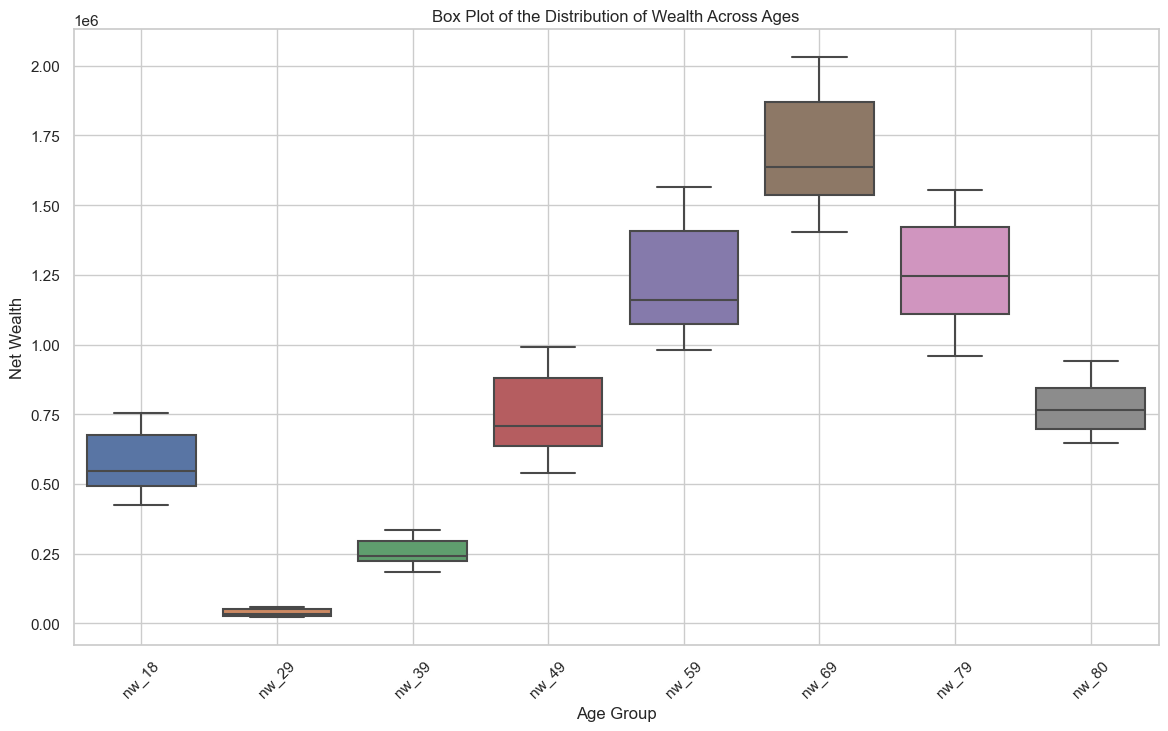

In [82]:
# Box Plot: Distribution of wealth across ages
# Filtering for 'All Denmark' to focus on age groups across the entire country
plt.figure(figsize=(14, 8))
sns.boxplot(data=nw_denmark, x='age_group', y='net_wealth')
plt.title('Box Plot of the Distribution of Wealth Across Ages')
plt.xlabel('Age Group')
plt.ylabel('Net Wealth')
plt.xticks(rotation=45)  # Rotating the x labels to make them readable
plt.grid(True)
plt.show()

CHANGE LABELS OF YEARS!! 

This box plot shows the distribution of wealth across different age groups. It provides insights into the median, quartiles, and the presence of any outliers in each age group, which helps to understand the spread and central tendency of the net wealth.

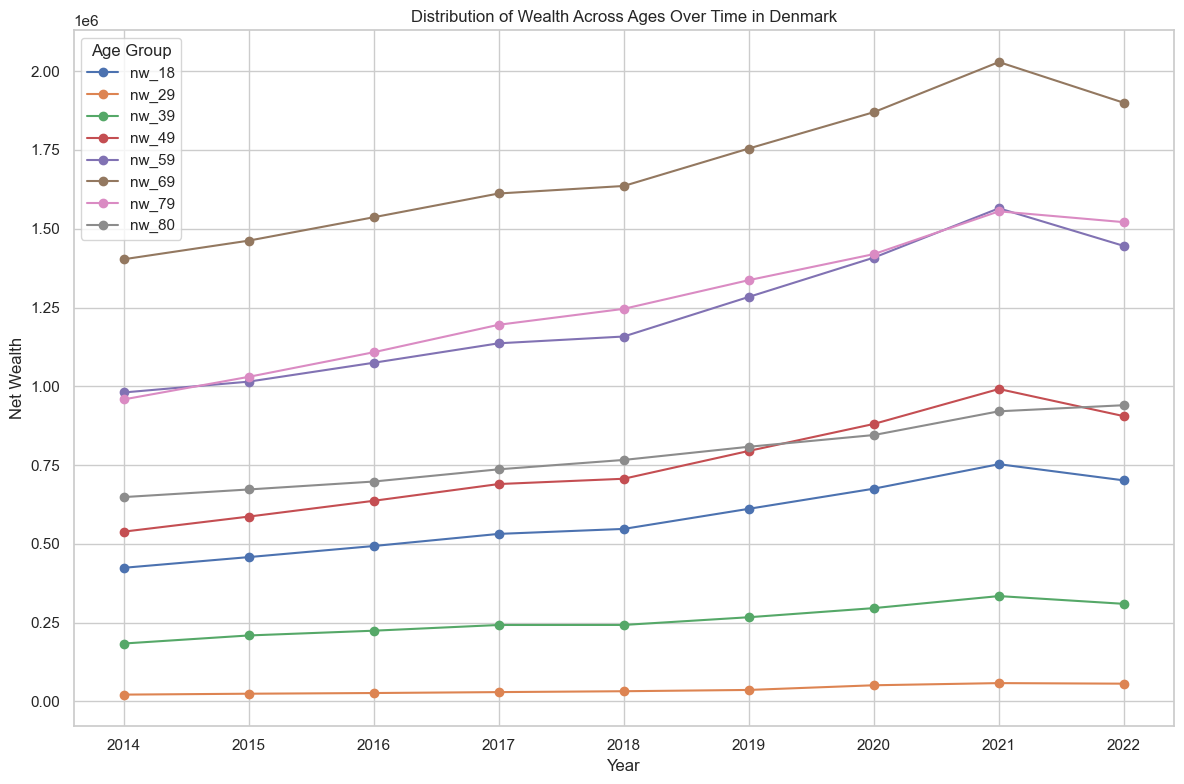

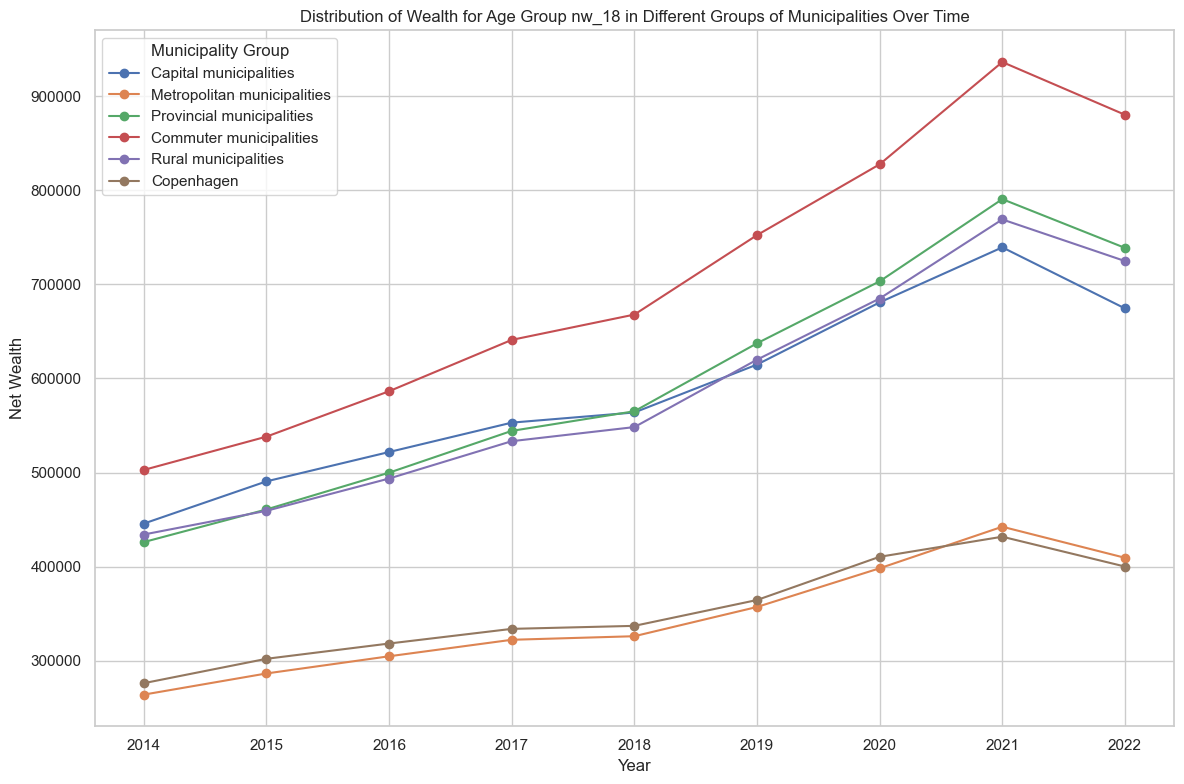

In [81]:
import matplotlib.pyplot as plt
import pandas as pd

# First graph: Distribution of wealth across ages + time
# Filter the DataFrame for 'All Denmark' to focus on age groups across the entire country
nw_denmark = nw_long[nw_long['location'] == 'All Denmark']

plt.figure(figsize=(12, 8))
for age_group in nw_denmark['age_group'].unique():
    # Select data for each age group
    data = nw_denmark[nw_denmark['age_group'] == age_group]
    plt.plot(data['year'], data['net_wealth'], marker='o', label=age_group)

plt.title('Distribution of Wealth Across Ages Over Time in Denmark')
plt.xlabel('Year')
plt.ylabel('Net Wealth')
plt.legend(title='Age Group')
plt.grid(True)
plt.tight_layout()
plt.show()

# Second graph: Distribution of wealth in different groups of municipalities for 'nw_18' age group
# Filter for 'nw_18' age group across all municipalities
nw_age_18 = nw_long[(nw_long['location'] != 'All Denmark') & (nw_long['age_group'] == 'nw_18')]

plt.figure(figsize=(12, 8))
for location in nw_age_18['location'].unique():
    # Select data for each municipality group
    data = nw_age_18[nw_age_18['location'] == location]
    plt.plot(data['year'], data['net_wealth'], marker='o', label=location)

plt.title('Distribution of Wealth for Age Group nw_18 in Different Groups of Municipalities Over Time')
plt.xlabel('Year')
plt.ylabel('Net Wealth')
plt.legend(title='Municipality Group')
plt.grid(True)
plt.tight_layout()
plt.show()

The first graph displays the distribution of wealth across different age groups over time in Denmark.
The second graph shows the distribution of wealth for the age group nw_18 in different groups of municipalities over time.

In [ ]:
rp_tot

In [ ]:
rp_tot_long = pd.melt(rp_tot, id_vars=['location'], var_name='year', value_name='relative_poverty')
rp_tot_long


In [ ]:
# Filter the DataFrame for 'All Denmark'
rp_all_dk = rp_tot_long[rp_tot_long['location'] == 'All Denmark']

# Plot the relative poverty data for 'All Denmark'
rp_all_dk.plot(x='year', y='relative_poverty', legend=False);

In [ ]:
merged_rp

In [ ]:
merged_rp_long = pd.melt(merged_rp, id_vars=['location'], var_name='year', value_name='relative_poverty')
merged_rp_long

In [ ]:
rp_all_dk = merged_rp_long.loc[merged_rp['location'] == 'All Denmark', :]

# Plot the content of the data frame
rp_all_dk.plot(x='year',y='empl',legend=False);

# Conclusion